## Project 1: Regression (Website traffic)

### Imports

In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

### Load data + explore

In [2]:
df = pd.read_csv('./Data/website_data.csv')

In [3]:
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [4]:
# df.shape

In [5]:
# df.describe

In [6]:
df.columns

Index(['Page Views', 'Session Duration', 'Bounce Rate', 'Traffic Source',
       'Time on Page', 'Previous Visits', 'Conversion Rate'],
      dtype='object')

In [7]:
# df.isna().sum()

### Encode categorical variable(s)

In [8]:
# encoder = OneHotEncoder(sparse_output=False)

# # One-hot encode the 'Traffic Source' column
# one_hot_encoded = encoder.fit_transform(df[['Traffic Source']])

# # Create a DataFrame with the one-hot encoded columns
# # Pass the column name (in a list) instead of the actual data
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Traffic Source']))

# # Concatenate the one-hot encoded dataframe with the original dataframe
# df_encoded = pd.concat([df, one_hot_df], axis=1)

# # Drop the original categorical column
# df_encoded = df_encoded.drop(['Traffic Source'], axis=1)

In [9]:
df.columns

Index(['Page Views', 'Session Duration', 'Bounce Rate', 'Traffic Source',
       'Time on Page', 'Previous Visits', 'Conversion Rate'],
      dtype='object')

### Define target variable + split data

In [10]:
X = df[['Page Views', 'Bounce Rate', 'Conversion Rate', 'Previous Visits', 'Session Duration']]
y = df[['Time on Page']]

In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [12]:
print(f"Train data amount: {len(X_train)}")
print(f"Test data amount: {len(X_test)}")
print(f"Validation data amount: {len(X_val)}")

Train data amount: 1400
Test data amount: 300
Validation data amount: 300


In [13]:
variable_amount = len(X.columns)

In [14]:
print(variable_amount)

5


### Neural Network

In [15]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1)  
])


model.compile(optimizer='adam', loss='mse')

model.summary()

C:\Users\ruben\anaconda3\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 5)                   │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,517 (9.83 KB)

 Trainable params: 2,507 (9.79 KB)

 Non-trainable params: 10 (40.00 B)

In [16]:
model.fit(x=X_train, y=y_train, epochs=750, validation_data=(X_val, y_val))

Epoch 1/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21.7125 - val_loss: 9.3478
Epoch 2/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.9411 - val_loss: 9.5065
Epoch 3/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.4954 - val_loss: 7.8152
Epoch 4/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9081 - val_loss: 7.3430
Epoch 5/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4916 - val_loss: 6.9823
Epoch 6/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2012 - val_loss: 6.7974
Epoch 7/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2950 - val_loss: 6.6965
Epoch 8/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.0970 - val_loss: 6.6835
Epoch 9/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1674 - val_loss: 6.5761
Epoch 10/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.0977 - val_loss: 6.5047
Epoch 11/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0695 - val_loss: 6.4797
Epoch 12/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3441 - val_loss: 6.1793
Epoch 70/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4164 - val_loss: 6.1942
Epoch 71/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.1243 - val_loss: 6.1817
Epoch 72/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0563 - val_loss: 6.2106
Epoch 73/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3234 - val_loss: 6.2319
Epoch 74/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3847 - val_loss: 6.1774
Epoch 75/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8128 - val_loss: 6.2299
Epoch 76/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7472 - val_loss: 6.2830
Epoch 77/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3569 - val_loss: 6.2363
Epoch 78/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7439 - val_loss: 6.2069
Epoch 79/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3130 - val_loss: 6.2656
Epoch 80/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.6985

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7498 - val_loss: 6.2599
Epoch 138/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8773 - val_loss: 6.2313
Epoch 139/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8574 - val_loss: 6.2822
Epoch 140/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7137 - val_loss: 6.2615
Epoch 141/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0183 - val_loss: 6.3100
Epoch 142/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9163 - val_loss: 6.2673
Epoch 143/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0476 - val_loss: 6.2532
Epoch 144/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8062 - val_loss: 6.2758
Epoch 145/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1052 - val_loss: 6.2776
Epoch 146/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1077 - val_loss: 6.3198
Epoch 147/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5727 - val_loss: 6.2653
Epoch 148/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

Epoch 205/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3104 - val_loss: 6.2891
Epoch 206/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4409 - val_loss: 6.3023
Epoch 207/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2181 - val_loss: 6.2766
Epoch 208/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9023 - val_loss: 6.2680
Epoch 209/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5291 - val_loss: 6.2496
Epoch 210/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3692 - val_loss: 6.2435
Epoch 211/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4815 - val_loss: 6.2930
Epoch 212/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2260 - val_loss: 6.3084
Epoch 213/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.0165 - val_loss: 6.2624
Epoch 214/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1096 - val_loss: 6.2690
Epoch 215/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9800 - val_loss: 6.2909
Epoch 216/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.8859 - val_loss: 6.2499
Epoch 273/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1969 - val_loss: 6.2362
Epoch 274/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7107 - val_loss: 6.2482
Epoch 275/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5523 - val_loss: 6.2598
Epoch 276/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9821 - val_loss: 6.2521
Epoch 277/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8771 - val_loss: 6.2767
Epoch 278/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8289 - val_loss: 6.2554
Epoch 279/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4700 - val_loss: 6.2472
Epoch 280/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7388 - val_loss: 6.2675
Epoch 281/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7348 - val_loss: 6.2326
Epoch 282/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4572 - val_loss: 6.2537
Epoch 283/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

Epoch 340/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1392 - val_loss: 6.2303
Epoch 341/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9820 - val_loss: 6.2386
Epoch 342/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1238 - val_loss: 6.2554
Epoch 343/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7790 - val_loss: 6.2848
Epoch 344/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7458 - val_loss: 6.2785
Epoch 345/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5522 - val_loss: 6.2736
Epoch 346/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8068 - val_loss: 6.2516
Epoch 347/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.6419 - val_loss: 6.3203
Epoch 348/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.1012 - val_loss: 6.2559
Epoch 349/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6546 - val_loss: 6.2657
Epoch 350/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1626 - val_loss: 6.2745
Epoch 351/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2423 - val_loss: 6.3523
Epoch 408/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1271 - val_loss: 6.3563
Epoch 409/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7932 - val_loss: 6.3397
Epoch 410/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3645 - val_loss: 6.3332
Epoch 411/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0182 - val_loss: 6.3973
Epoch 412/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4245 - val_loss: 6.3448
Epoch 413/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8823 - val_loss: 6.4113
Epoch 414/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1956 - val_loss: 6.3904
Epoch 415/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8388 - val_loss: 6.3349
Epoch 416/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9430 - val_loss: 6.3039
Epoch 417/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7025 - val_loss: 6.3146
Epoch 418/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

Epoch 475/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8777 - val_loss: 6.3920
Epoch 476/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1026 - val_loss: 6.4029
Epoch 477/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7948 - val_loss: 6.4030
Epoch 478/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7496 - val_loss: 6.3739
Epoch 479/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3101 - val_loss: 6.3746
Epoch 480/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5305 - val_loss: 6.3541
Epoch 481/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6114 - val_loss: 6.3612
Epoch 482/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4513 - val_loss: 6.3642
Epoch 483/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9060 - val_loss: 6.4068
Epoch 484/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9751 - val_loss: 6.3772
Epoch 485/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1586 - val_loss: 6.4064
Epoch 486/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3331 - val_loss: 6.3677
Epoch 543/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3779 - val_loss: 6.3799
Epoch 544/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5752 - val_loss: 6.4013
Epoch 545/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8545 - val_loss: 6.3813
Epoch 546/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7748 - val_loss: 6.3663
Epoch 547/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.2343 - val_loss: 6.3675
Epoch 548/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8107 - val_loss: 6.3993
Epoch 549/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3800 - val_loss: 6.4278
Epoch 550/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4330 - val_loss: 6.4342
Epoch 551/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7601 - val_loss: 6.4148
Epoch 552/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2392 - val_loss: 6.4143
Epoch 553/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

Epoch 610/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9330 - val_loss: 6.3576
Epoch 611/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4563 - val_loss: 6.3886
Epoch 612/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4001 - val_loss: 6.3781
Epoch 613/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0655 - val_loss: 6.4071
Epoch 614/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0753 - val_loss: 6.3808
Epoch 615/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6268 - val_loss: 6.3847
Epoch 616/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0109 - val_loss: 6.4103
Epoch 617/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3152 - val_loss: 6.4110
Epoch 618/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2646 - val_loss: 6.3912
Epoch 619/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6920 - val_loss: 6.4162
Epoch 620/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0878 - val_loss: 6.3908
Epoch 621/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5953 - val_loss: 6.3983
Epoch 678/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5105 - val_loss: 6.3649
Epoch 679/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9859 - val_loss: 6.3850
Epoch 680/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5380 - val_loss: 6.3840
Epoch 681/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3904 - val_loss: 6.3893
Epoch 682/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5763 - val_loss: 6.4340
Epoch 683/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3146 - val_loss: 6.4061
Epoch 684/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1977 - val_loss: 6.4089
Epoch 685/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7321 - val_loss: 6.3963
Epoch 686/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6581 - val_loss: 6.3546
Epoch 687/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6795 - val_loss: 6.3912
Epoch 688/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

Epoch 745/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7933 - val_loss: 6.4024
Epoch 746/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3612 - val_loss: 6.4111
Epoch 747/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5297 - val_loss: 6.4090
Epoch 748/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5260 - val_loss: 6.3631
Epoch 749/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.2511 - val_loss: 6.4131
Epoch 750/750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2243 - val_loss: 6.3935


<AxesSubplot:>

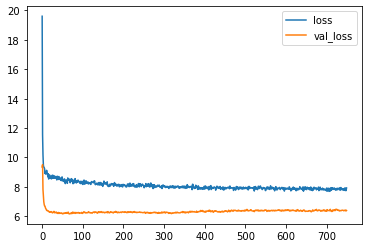

In [17]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [18]:
# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
7.8159074783325195

Train data evaluation:
7.482439994812012


In [19]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Test True Y,Model Predictions
0,1.163765,1.904757
1,3.437920,4.553586
2,8.782301,4.301853
3,3.890301,4.565319
4,0.876334,4.133048
...,...,...
295,6.408842,4.661017
296,2.999242,4.759830
297,1.497355,4.330085
298,2.550217,2.966039


In [20]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "seconds")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "seconds^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "seconds")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
2.14 seconds

MSE
7.82 seconds^2

RMSE:
2.8 seconds

R-squared:
0.05

Explained variance score:
0.05


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

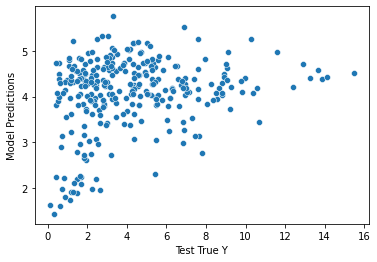

In [21]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [22]:
sns.jointplot(data=df_encoded, x="Bounce Rate", y="Time on Page", hue="Conversion Rate")

NameError: name 'df_encoded' is not defined

In [ ]:
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

As we see the metrics are as far from good as they can be. Let's try another approach.

### NN Model, try 2

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# model = keras.Sequential(
#     [
#         layers.BatchNormalization(input_shape=(10,)),
#         layers.Dense(64, activation="relu"),
#         layers.Dense(32, activation="relu"),
#         layers.Dense(16, activation="relu"),
#         layers.Dense(8, activation="relu"),
#         layers.Dense(1)
#     ]
# )

# model.compile(optimizer='adam', loss='mse')
# model.summary()

In [ ]:
# model.fit(x=X_train_scaled, y=y_train, epochs=1000, validation_data=(X_val_scaled, y_val))

In [ ]:
# loss_df = pd.DataFrame(model.history.history)
# loss_df.plot()

In [ ]:
# # compare the final model loss/evaluation values
# print("Test data evaluation:")
# print(model.evaluate(X_test, y_test, verbose=0))
# print("\nTrain data evaluation:")
# print(model.evaluate(X_train, y_train, verbose=0))

In [ ]:
# test_predictions = model.predict(X_test)

# # reshape the data for easier comparison table
# test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
# pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
# pred_df = pd.concat([pred_df, test_predictions], axis=1)
# pred_df.columns = ['Test True Y', 'Model Predictions']

# # print the comparison table - true values vs. model predicted values
# # we can nicely see here how far off our model is in some cases
# pred_df

In [ ]:
# # MAE - Mean average error
# print("MAE")
# print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "seconds")

# # MSE - Mean square error
# print("\nMSE")
# print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "seconds^2")

# # RMSE - Root mean square error
# print('\nRMSE:')
# print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "seconds")

# # R-squared. 0 = the model descibes the dataset poorly
# # 1 = model describes the dataset perfectly
# print('\nR-squared:')
# print(round(metrics.r2_score(y_test, test_predictions), 2))

# # Explained Variance Score => 0 = the model descibes the dataset poorly
# # 1 = model describes the dataset perfectly
# # high variance score = model is a good fit for the data 
# # low variance score = model is not a good fit for the data
# # the higher the score, the model is more able to explain the variation in the data
# # if score is low, we might need more and better data
# print("\nExplained variance score:")
# print(round(metrics.explained_variance_score(y_test, test_predictions), 2))